In [18]:
using PyPlot, LaTeXStrings, DelimitedFiles, LinearAlgebra
using PyCall
LineCollection = matplotlib.collections.LineCollection
include("tweezerDS_potential.jl")  #The potential function V(x) is defined in another file 

Efield (generic function with 1 method)

## Plot the BO potential in the fancy way

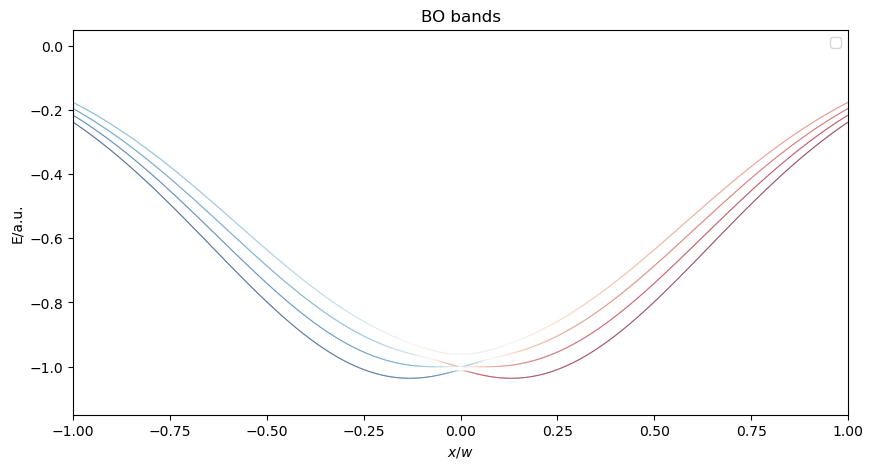

PyObject <matplotlib.legend.Legend object at 0x00000000C3192E00>

In [51]:
cmap = matplotlib.cm.get_cmap("RdBu");
fig, ax = plt.subplots(figsize=(10, 5))

δtw = 0.3
xdum = range(-1, 1, length=5001)
potentials,szexp = get_levels(xdum;return_vecs = true)


bandsNumber= 4
for (i, p) ∈ enumerate( eachrow(potentials'[1:bandsNumber,:]) )
    a = [xdum p]
    linecol = cat(a[1:(end-1), :], a[2:end, :], dims = 3)
    linecol = permutedims(linecol, [1, 3, 2])
    lc = LineCollection(linecol, colors = cmap.(szexp[:, i]/16.0 .+ 0.5), lw = 0.7)
    ax.add_collection(lc)
end

ax.set_ylim([-1.15, 0.05])
ax.set_xlim([-1, 1])

ax.set_xlabel(L"x/w ")  
ax.set_ylabel("E/a.u.")  
ax.set_title("BO bands")  

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

## Define functions

for the non-adiabatic potential and the plot

In [43]:
GSvec(x)=real(eigvecs(V(x))[:,1])

function gauge_trans(x)  # The input is a vector of vector which is the spinor wavefunction components.
    for i in 1:length(x)-1
        if norm(x[i]+x[i+1])<norm(x[i]-x[i+1])
            x[i+1]=-x[i+1]
        end
    end
    return x
end

function vec_pot(δ ,x,lowband)
    l = length(lowband)
    A00 = zeros(l)
    [A00[i]=dot( lowband[i],lowband[i+1]-lowband[i] )/δ for i in 1:(l-1) ]
    A00[l]=A00[l-1]
    return A00
end

function vec_pot_sqr(δ , x, lowband)
    l = length(lowband)
    A00_sqr = zeros(l)       #0 stands for dark state. m stands for lower band. p stands for higher band.
    [A00_sqr[i]=dot( lowband[i],lowband[i+1]-2*lowband[i]+lowband[i-1] )/δ^2 for i in 2:(l-1) ]
    A00_sqr[1]=A00_sqr[2];
    A00_sqr[l]=A00_sqr[l-1];
    return A00_sqr
end

function DS_plot(xdum)
    δstep=xdum[2]-xdum[1];
    lowband = gauge_trans(GSvec.(xdum) );
    Vna = vec_pot_sqr(δstep ,xdum,lowband);
    
    fig, ax = plt.subplots(figsize=(5, 3))
    
    ax.plot(xdum,-Vna/(2pi)^2*(0.74/2)^2 , lw = 0.7)   #The extra (0.74/2)^2 comes from the difference between λ and tweezer waist

    ax.set_xlabel(L"$x/w$")  
    ax.set_ylabel(L"$E/E_r$")  
    ax.set_title(L"V_{na}") 
end

function GS_plot(xdum)
    δstep=xdum[2]-xdum[1];
    lowband = gauge_trans(GSvec.(xdum) );
    Vna = vec_pot_sqr(δstep ,xdum,lowband);
    potentials = get_levels(xdum)[:,1:3]
    
    fig, ax = plt.subplots(1,2,figsize=(7, 4))
    
    
    ax[1].plot(xdum,1500*potentials[:,1:3] , lw = 0.7) 
    ax[2].plot(xdum,1500*potentials[:,1].-Vna/(2pi)^2*(0.74/2)^2, lw = 0.7)
    ax[2].plot(xdum,1500*potentials[:,2:3], lw = 0.7)
    
    ax[1].set_xlabel(L"$x/w$")  
    ax[1].set_ylabel(L"$E/E_r$")  
    ax[1].set_title("BO bands") 
    
    ax[2].set_xlabel(L"$x/w$")  
    ax[2].set_yticks([])
    string="w/ correction @d=$δtw w";
    ax[2].set_title(string) 
end


GS_plot (generic function with 1 method)

## The vector potential of the internal winding

In contrast to what we though, the spin would change faster in the middle if we have larger layer separation. You could change $\delta$lat below to see how $<m_z>$ winds in space. When $\delta$lat is smaller, we have a larger derivative in a smaller region.

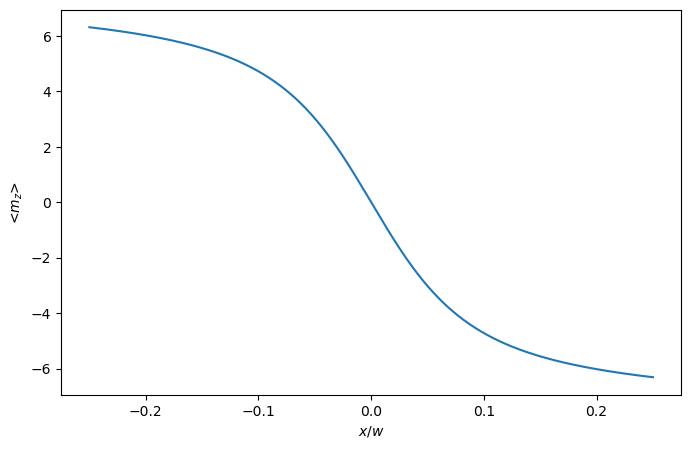

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000C007DBA0>

In [49]:
xdum = range(-0.25, 0.25, length=1001)
δtw = 0.05


potentials,szexp = get_levels(xdum;return_vecs = true)
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel(L"x/w ")  
ax.set_ylabel(L"<$m_z$>")  

ax.plot(xdum,szexp[:,1])

## Plot non-adiabatic potential $V_{na}$ for different bilayer distance

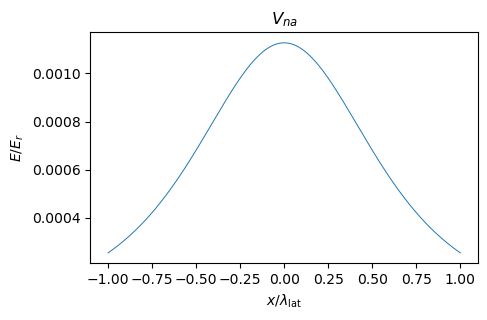

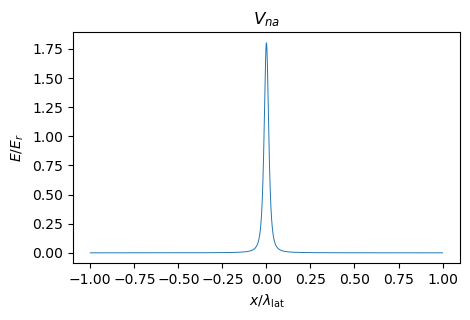

PyObject Text(0.5, 1.0, '$V_{na}$')

In [39]:
δstep = 0.0005;
xdum = (-1:δstep:1.;)

δtw=0.005
DS_plot(xdum)
δtw=0.2
DS_plot(xdum)

## Plot BO potential+ NA potential

### In the plot function, suppose that the BO lattice is 1500 Er ~ 3 MHz

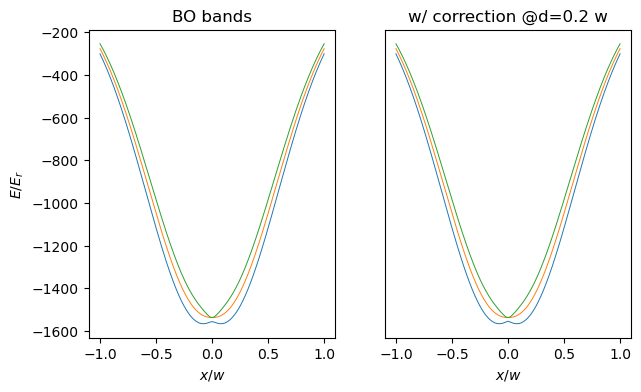

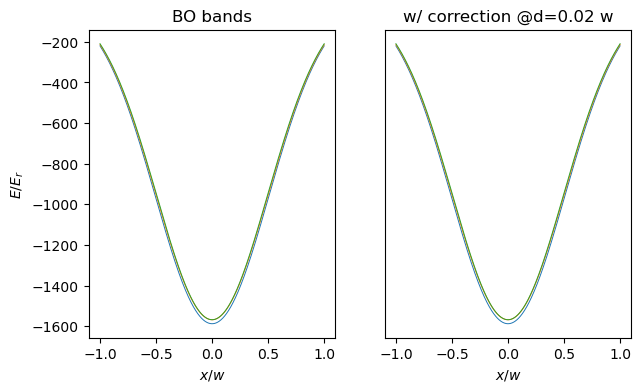

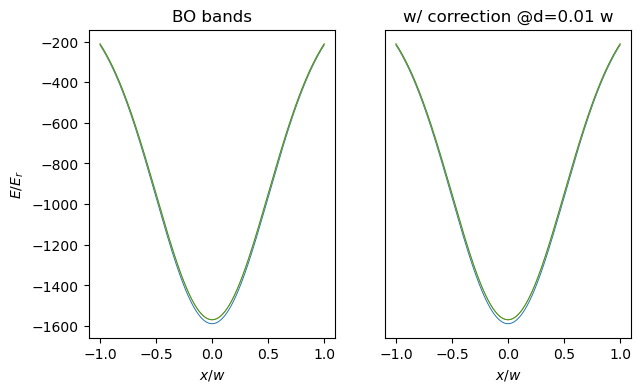

PyObject Text(0.5, 1.0, 'w/ correction @d=0.01 w')

In [44]:
δstep = 0.0005;
xdum = (-1:δstep:1.;)

δtw=0.2
GS_plot(xdum)
δtw=0.02
GS_plot(xdum)
δtw=0.01
GS_plot(xdum)